### Import Required Libraries
We begin by importing essential Python libraries:

- `pandas` and `numpy` for data manipulation and numerical computations.
- `matplotlib` and `seaborn` for visualizations to understand the dataset.
- `sklearn` for data preprocessing, model training, and evaluation.


In [52]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [60]:
# Load synthetic data
df = pd.read_csv("synthetic_financial_data.csv")

# Display basic information about the dataset
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  object 
 1   AccountID         10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   TransactionDate   10000 non-null  object 
 4   TransactionTime   10000 non-null  object 
 5   Location          10000 non-null  object 
 6   MerchantCategory  10000 non-null  object 
 7   TransactionType   10000 non-null  object 
 8   DeviceID          10000 non-null  object 
 9   Fraud             10000 non-null  bool   
dtypes: bool(1), float64(1), object(8)
memory usage: 713.0+ KB
None


In [56]:
print(df.describe())


             Amount
count  10000.000000
mean    5424.392462
std     3378.821930
min        2.310000
25%     2714.395000
50%     5312.675000
75%     7839.635000
max    19951.720000


In [58]:
# Check the first few rows
print(df.head())


  TransactionID  AccountID   Amount TransactionDate TransactionTime Location  \
0    TXN-346801  ACC-21782  2317.32      2024-03-24        17:43:34   City A   
1    TXN-495845  ACC-73523  1882.10      2024-06-05        21:58:25   City C   
2    TXN-444702  ACC-52828  1694.44      2024-12-23        17:41:27   City C   
3    TXN-409772  ACC-35870    61.31      2024-05-01        15:41:46   City C   
4    TXN-246026  ACC-91780  2274.25      2024-03-21        19:04:32   City E   

  MerchantCategory TransactionType  DeviceID  Fraud  
0      Electronics  Mobile Payment  DEV-5455  False  
1           Retail          Online  DEV-8653  False  
2           Retail   Wire Transfer  DEV-2458  False  
3      Electronics  Mobile Payment  DEV-3797  False  
4           Travel          Online  DEV-9707  False  


In [62]:
# Check for missing values
print(df.isnull().sum())


TransactionID       0
AccountID           0
Amount              0
TransactionDate     0
TransactionTime     0
Location            0
MerchantCategory    0
TransactionType     0
DeviceID            0
Fraud               0
dtype: int64


### Visualize the Data
- **Fraud vs Non-Fraud Distribution**: Use a count plot to compare the number of fraudulent and non-fraudulent transactions.
- **Transaction Amount Distribution**: Examine how transaction amounts vary for fraudulent and non-fraudulent transactions using a histogram and KDE plot.


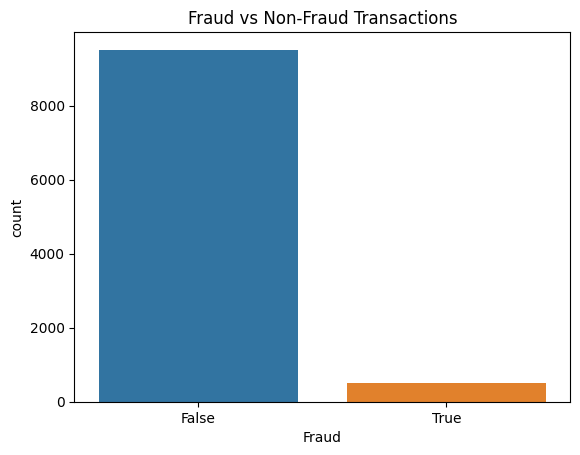

C:\Users\tetra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


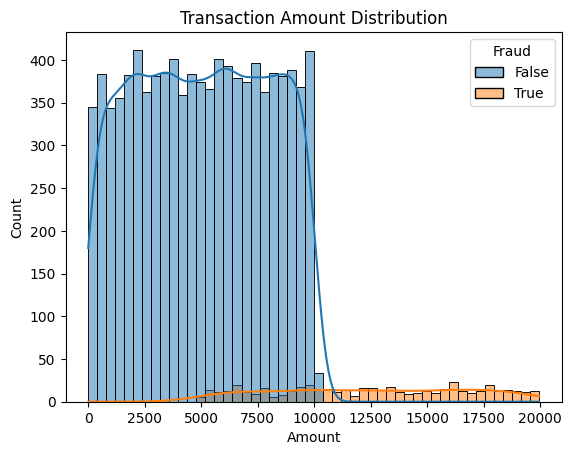

In [70]:
# Fraud vs Non-Fraud Distribution
if 'Fraud' in df.columns:
    sns.countplot(data=df, x='Fraud')
    plt.title("Fraud vs Non-Fraud Transactions")
    plt.show()
else:
    print("Column 'Fraud' not found in the dataset!")

# Check for extreme values in 'Amount' column
if 'Amount' in df.columns:
    sns.histplot(data=df, x='Amount', hue='Fraud', bins=50, kde=True)
    plt.title("Transaction Amount Distribution")
    plt.show()
else:
    print("Column 'Amount' not found in the dataset!")


### Preprocess the Data
- **Label Encoding**: Convert categorical columns (`MerchantCategory`, `TransactionType`) to numerical values using `LabelEncoder`.
- **Feature and Target Separation**: Split the dataset into features (`X`) and the target variable (`y`).
- **Scaling Features**: Use `StandardScaler` to normalize numerical data for consistent model performance.
- **Train-Test Split**: Divide the data into training and testing sets for model evaluation.


In [74]:
# Check data types
print(df.dtypes)

# Filter numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns
X = df[numeric_columns]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separate target variable and features
y = df['Fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


TransactionID        object
AccountID            object
Amount              float64
TransactionDate      object
TransactionTime      object
Location             object
MerchantCategory      int32
TransactionType       int32
DeviceID             object
Fraud                  bool
dtype: object


In [76]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['MerchantCategory'] = label_encoder.fit_transform(df['MerchantCategory'])
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])

# Separate features (X) and target variable (y)
X = df.drop(columns=["Fraud", "TransactionID"])

# Check data types to ensure all columns to scale are numeric
numeric_columns = X.select_dtypes(include=[np.number]).columns
X = X[numeric_columns]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separate target variable
y = df["Fraud"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Train the Model
- **Random Forest Classifier**: A robust machine learning algorithm is used to detect fraud.
- **Model Training**: Fit the model on the training dataset to learn patterns.
- **Model Evaluation**: Use the test dataset to evaluate performance with a classification report.


In [78]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1897
        True       0.70      0.71      0.70       103

    accuracy                           0.97      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.97      0.97      0.97      2000



Key Metrics:
Precision (True Positive Rate):

False Class: 0.98 – Your model is very good at predicting the majority class (non-fraud) correctly.
True Class: 0.70 – For fraud cases, the model is less accurate, with 30% of fraud cases incorrectly classified.
Recall (Sensitivity/True Positive Rate):

False Class: 0.98 – High recall for the non-fraud class, meaning the model is good at identifying most of the non-fraud cases.
True Class: 0.71 – For fraud cases, the recall is lower, meaning that the model is catching about 71% of the fraud instances but missing around 29% of them.
F1-Score (Harmonic Mean of Precision and Recall):

False Class: 0.98 – A very good F1 score for the non-fraud class, indicating a strong balance between precision and recall.
True Class: 0.70 – The F1 score for fraud cases is lower, reflecting the trade-off between precision and recall for fraud detection.
Accuracy: 0.97 – Overall, the model performs well, correctly classifying 97% of the instances, but this is biased towards the majority class due to the class imbalance.

Macro Average: 0.84 for precision and 0.85 for recall – This average treats both classes equally, giving a better perspective of overall model performance across imbalanced classes.

Weighted Average: 0.97 for precision, recall, and F1 score – This average takes into account the support (class distribution) and shows that the model is doing well overall, especially for the non-fraud class.

### Evaluate Model Performance
- **Confusion Matrix**: Visualize model predictions against actual outcomes to identify true positives, true negatives, false positives, and false negatives.
- **ROC Curve**: Analyze the model's ability to distinguish between classes using the Receiver Operating Characteristic curve.


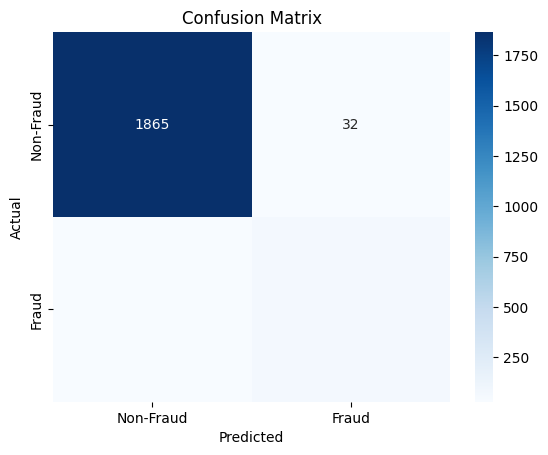

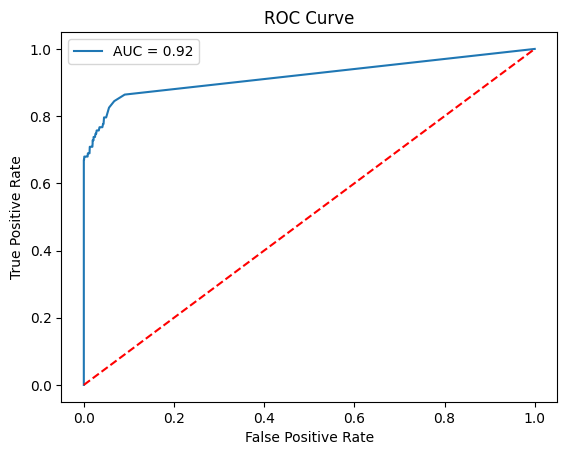

In [81]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


### Save and Deploy the Model
- **Save the Model**: Use `joblib` to save the trained Random Forest model for future use.
- **Save the Scaler**: Save the data scaler to ensure consistent preprocessing during deployment.
- **Test Saved Model**: Load the saved model and make sample predictions to verify its functionality.


In [83]:
import joblib

# Save the trained model
joblib.dump(model, "fraud_detection_model.pkl")

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

# Load the model for testing (optional)
loaded_model = joblib.load("fraud_detection_model.pkl")
test_prediction = loaded_model.predict(X_test[:5])
print("Sample Test Predictions:", test_prediction)


Sample Test Predictions: [False False False  True False]


### Visualize Insights
- **Fraud Rate by Merchant Category**: Analyze fraud percentages across different merchant categories to identify high-risk areas.
- **Fraud Rate by Transaction Type**: Examine fraud rates for various transaction types to gain deeper insights into patterns.


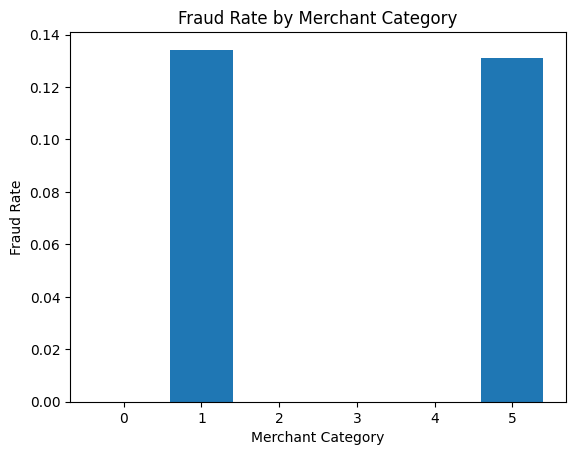

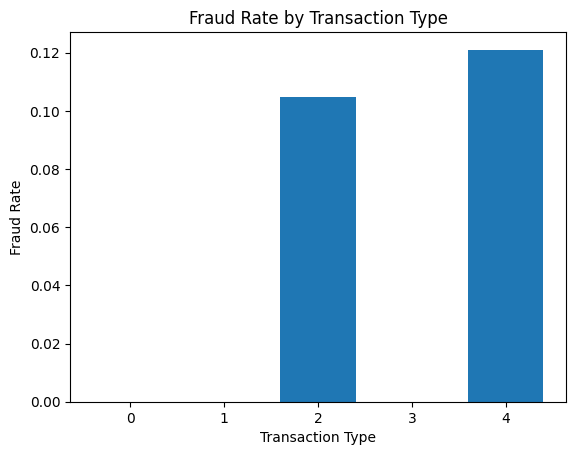

In [85]:
# Fraud percentage by Merchant Category
merchant_fraud_rate = df.groupby("MerchantCategory")["Fraud"].mean()
merchant_fraud_rate = merchant_fraud_rate.sort_values(ascending=False)
plt.bar(merchant_fraud_rate.index, merchant_fraud_rate.values)
plt.title("Fraud Rate by Merchant Category")
plt.xlabel("Merchant Category")
plt.ylabel("Fraud Rate")
plt.show()

# Fraud percentage by Transaction Type
transaction_fraud_rate = df.groupby("TransactionType")["Fraud"].mean()
transaction_fraud_rate = transaction_fraud_rate.sort_values(ascending=False)
plt.bar(transaction_fraud_rate.index, transaction_fraud_rate.values)
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()
